In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, BatchNormalization, Flatten
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [20]:
np.random.seed(439948)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

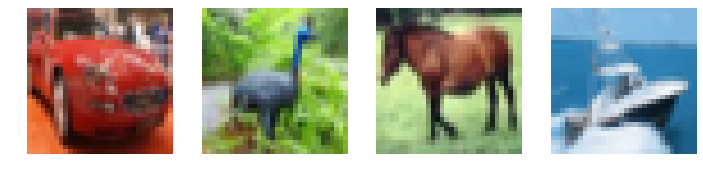

In [13]:
# for i i
fig, axes = plt.subplots(1, 4, figsize=(12,8))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i+5])
    ax.axis('off')

## Simple Keras classifier

In [23]:
model = tf.keras.models.Sequential([
    Input(shape=(32,32,3)),
    Conv2D(16, kernel_size=3, padding='same'),
    MaxPool2D(padding='same'), 
    Conv2D(32, kernel_size=3, padding='same'),
    MaxPool2D(padding='same'), 
    Conv2D(64, kernel_size=3, padding='same'),
    Flatten(), 
    Dense(256),
    Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [25]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(
    optimizer, 
    loss=loss, 
    metrics=['accuracy'])

In [ ]:
model.fit(
    x_train, y_train, 
    batch_size=256, 
    epochs=10)